## Training

In [1]:

import os
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap

# =============== 1. 读取数据 ======================
X_trimmed = np.load('/data/hanzhe/20250424cs/X_trimmed.npy')
y_trimmed = np.load('/data/hanzhe/20250424cs/y_trimmed.npy')   # 若不需要颜色，可删除

# =============== 2. 训练无监督 UMAP ===============
unsupervised_reducer = umap.UMAP(
    n_components=2,
    n_neighbors=15,
    min_dist=0.1,
    metric='euclidean',
    random_state=42
)
embedding_unsup = unsupervised_reducer.fit_transform(X_trimmed)

# =============== 3. 保存模型和结果 ===============
output_dir = '/data/hanzhe/20250424cs/umap_unsupervised'
os.makedirs(output_dir, exist_ok=True)

joblib.dump(unsupervised_reducer, f'{output_dir}/umap_model.joblib')
np.save(f'{output_dir}/embedding_unsupervised.npy', embedding_unsup)





/home/user/anaconda3/envs/gpu/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-04-24 11:26:35.227850: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745493995.242942 1773312 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745493995.247515 1773312 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745493995.260422 1773312 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once

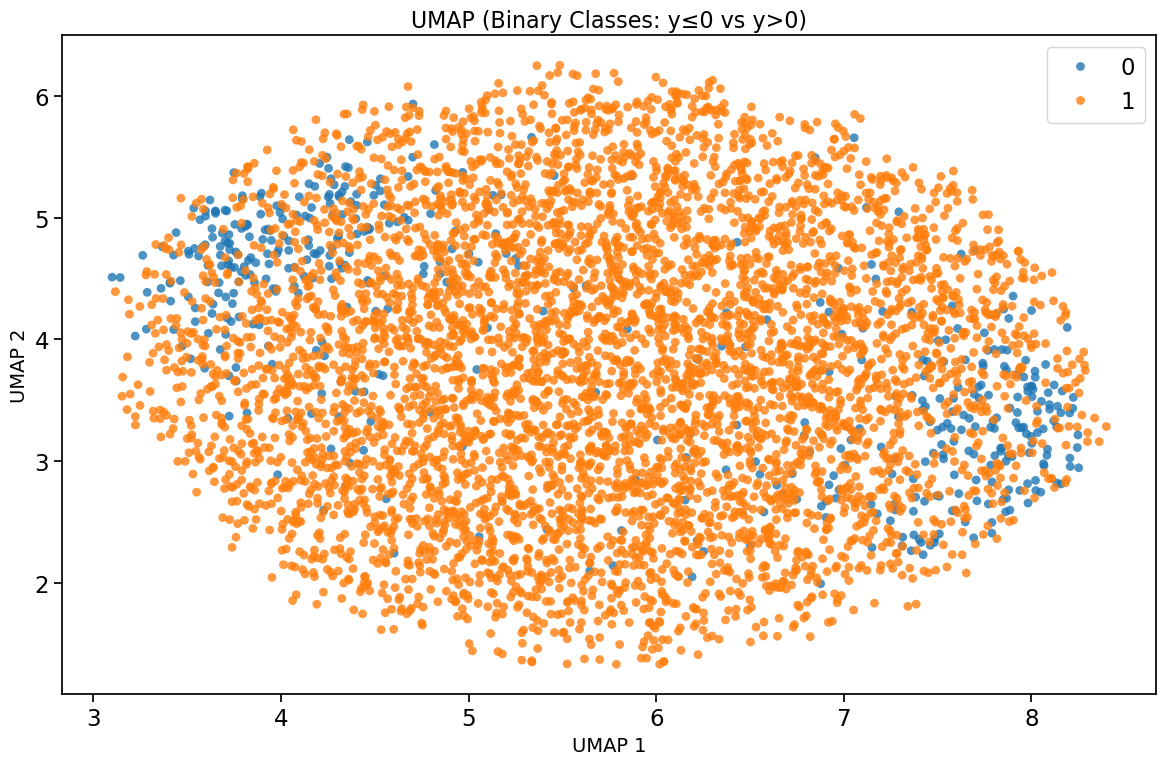

In [5]:

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ───────── 1. 读取数据 ─────────
embed_path = '/data/hanzhe/20250424cs/umap_unsupervised/embedding_unsupervised.npy'
y_path     = '/data/hanzhe/20250424cs/y_trimmed.npy'

embedding = np.load(embed_path)          # (n_samples, 2)
y         = np.load(y_path)              # (n_samples,)

# ───────── 2. 压缩为两类 ─────────
#   label_bin = 0  ⇨  y <= 0
#   label_bin = 1  ⇨  y > 0
label_bin = (y > 0).astype(int)

# ───────── 3. 绘图 ─────────
sns.set_context("notebook", font_scale=1.5)
plt.figure(figsize=(12, 8))

palette = {0: "#1f77b4", 1: "#ff7f0e"}    # 两种颜色，可自行调
sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=label_bin,
    palette=palette,
    alpha=0.8,
    s=40,
    edgecolor="none"
)

plt.title("UMAP (Binary Classes: y≤0 vs y>0)", fontsize=16)
plt.xlabel("UMAP 1", fontsize=14)
plt.ylabel("UMAP 2", fontsize=14)

plt.tight_layout()

# ───────── 4. 保存图像 ─────────
out_path = '/data/hanzhe/20250424cs/umap_unsupervised/umap_scatter_binary.png'
plt.savefig(out_path, dpi=300)
plt.show()



## Inference 无监督没有inference